In [ ]:
from notebooks import *
figsize(aspect=1/4);

In [ ]:
# filename = 'rec-v2-2018-11-17T02-37-12-653Z-361d91fc.wav'
# filename = 'rec-v2-2018-11-17T02-49-15-425Z-bea40fe6.wav'
# filename = 'rec-v2-2018-11-21T07-41-18-480Z-dbabcb08.mp4' # FIXME (44KHz, 2ch)
# filename = 'rec-v2-2018-11-21T08-18-35-569Z-a61aa854.m4a' # FIXME
# filename = 'rec-v2-2018-11-21T08-24-19-826Z-3cf0618f.m4a' # FIXME
# filename = 'rec-v2-2018-11-21T09-05-39-801Z-b3fa5691.m4a' # FIXME
# filename = 'rec-v2-2018-11-21T09-15-12-001Z-fda09aca.mp4' # (22KHz, 1ch) -- FIXME bitrate=1
# filename = 'rec-v2-2018-11-21T09-19-31-431Z-a3795378.mp4' # (44KHz, 2ch) -- TODO nontrivial bitrate!
filename = 'rec-v2-2018-11-21T09-21-01-269Z-a7137847.mp4' # (44KHz, 1ch) -- TODO nontrivial bitrate!
# filename = 'rec-v2-2018-11-21T09-25-16-051Z-665f65b4.mp4' # (22KHz, 1ch) -- FIXME bitrate=1
# filename = 'rec-v2-2018-11-21T09-36-35-749Z-a774fddb.wav' # (22KHz, 1ch) -- FIXME bitrate=1
path = f'/Users/danb/Desktop/{filename}'
audio = audiosegment.from_file(path)
audio

/Users/danb/Desktop/rec-v2-2018-11-21T09-21-01-269Z-a7137847.mp4: 1 channels, 16 bit, sampled @ 44.1 kHz, 1.810s long

WARNING  [01:49:37.006] [62497]  91 features/unpack_rec: Nonstandard sample_rate[44100] != standard[22050] for audio[/Users/danb/Desktop/rec-v2-2018-11-21T09-21-01-269Z-a7137847.mp4: 1 channels, 16 bit, sampled @ 44.1 kHz, 1.810s long]

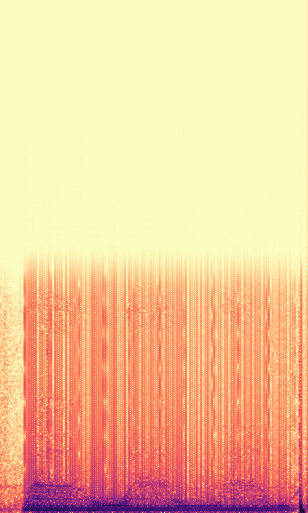

In [ ]:
Spectro(audio).plot(raw=True)

WARNING  [01:49:37.259] [62497]  91 features/unpack_rec: Nonstandard sample_rate[44100] != standard[22050] for audio[/Users/danb/Desktop/rec-v2-2018-11-21T09-21-01-269Z-a7137847.mp4: 1 channels, 16 bit, sampled @ 44.1 kHz, 1.810s long]

WARNING  [01:49:37.268] [62497]  91 features/unpack_rec: Nonstandard sample_rate[44100] != standard[22050] for audio[/Users/danb/Desktop/rec-v2-2018-11-21T09-21-01-269Z-a7137847.mp4: 1 channels, 16 bit, sampled @ 44.1 kHz, 1.810s long]

/Users/danb/miniconda3/envs/bubo-features/lib/python3.6/site-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


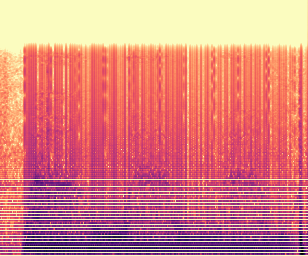

In [ ]:
Melspectro(audio).plot(raw=True)

In [ ]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
def y_inspect(y):
    display(y.shape, y.dtype, y.min(), y.max())
    plt.plot(y[:1000]); plt.show()
    plt.plot(y); plt.show()

In [ ]:
y = audio.to_numpy_array()
y_inspect(y)

In [ ]:
samples = (np.array(json.load(open(f'{path}.samples.json')))
    .astype('int8')  # Same as without
    + 128  # HACK Undo -128 from js
)
y_inspect(samples)

In [ ]:
y_inspect(y)

In [ ]:
# TODO TODO Got it! Need Int16Array b/c bitsPerSample=16!
#   - Keep pushing through the change in RecordScreen and debugging. Very close!
d0 = (np.array(json.load(open(f'/Users/danb/Desktop/datas-0.json')))
    .astype('int16')  # Same as without
)
y_inspect(d0)


In [ ]:
y_inspect(samples[:100])

In [ ]:
y_inspect(samples[:100].view('int16'))